# 必要なモジュールのインポート


In [1]:
%matplotlib inline
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

c:\users\user\appdata\local\conda\conda\envs\my_root\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 前処理

## テストデータの取得
Kerasが提供してくれている手書き数字文字を取得します。

* x_train : 訓練用のデータ
* y_train : 訓練用のデータのラベル
* x_test : テスト用のデータ
* y_test : テスト用のデータのラベル


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_org = x_train.copy()
y_train_org = y_train.copy()
x_test_org = x_test.copy()
y_test_org = y_test.copy()
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

## テストデータの内容確認①
x_train,x_testは、それぞれ3次元の配列で渡されます。<br>
x_trainは60000枚の28px*28pxの画像、x_testは10000枚の28px*28pxの画像。<br>
x_train,y_trainの配列がどのような形をしているか、確認してみます。

In [3]:
# 内容確認。ここは書かなくてOKです
print("x_trainの形:{}".format(x_train.shape))
print("y_trainの形:{}".format(y_train.shape))
print("x_testの形:{}".format(x_test.shape))
print("y_test:{}".format(y_test.shape))

x_trainの形:(60000, 28, 28)
y_trainの形:(60000,)
x_testの形:(10000, 28, 28)
y_test:(10000,)


********************************
TRAIN
********************************

Digit :0, have :5923 samples


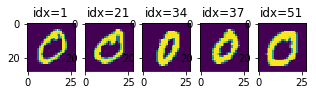

Digit :1, have :6742 samples


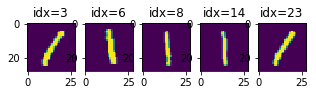

Digit :2, have :5958 samples


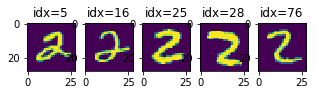

Digit :3, have :6131 samples


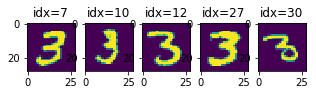

Digit :4, have :5842 samples


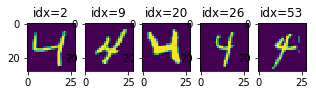

Digit :5, have :5421 samples


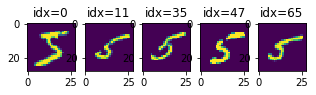

Digit :6, have :5918 samples


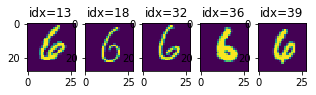

Digit :7, have :6265 samples


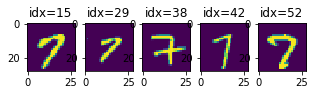

Digit :8, have :5851 samples


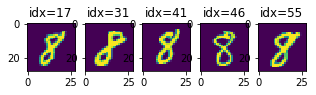

Digit :9, have :5949 samples


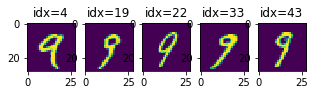

In [4]:
# 学習とテストデータを閲覧する
columns = 5
rows = 1
# 一行で複数の画像を描画する
def display_thumb_line(x_data_set, sample_index):
    fig=plt.figure(figsize=(5, 5))
    n_sample = min(len(sample_index), (columns * rows))
    for idx in range(n_sample):
        fig.add_subplot(rows, columns, idx + 1)
        plt.imshow(x_data_set[sample_index[idx]])
        plt.title("idx={0}".format(sample_index[idx]))
    plt.show()

def display_small_image(img):
    fig=plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 5, 1)
    plt.imshow(img)
    plt.show()

print("********************************")
print("TRAIN")
print("********************************\n")
for digit in range(10):
    try:
        sample_index = np.argwhere(y_train_org == digit)
    except ValueError:
        sample_index = []
    sample_index = sample_index.reshape(-1)
    if (len(sample_index) > 0):
        print("Digit :{0}, have :{1} samples".format(digit, len(sample_index)))
        display_thumb_line(x_train_org, sample_index)

********************************
TEST
********************************



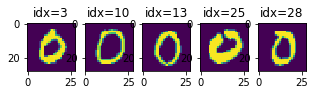

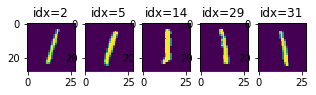

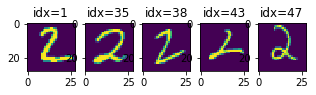

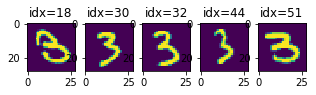

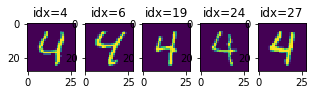

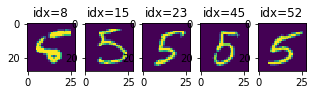

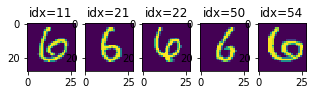

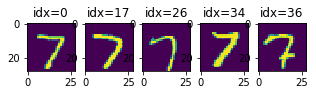

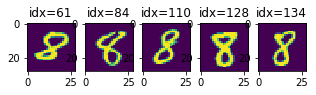

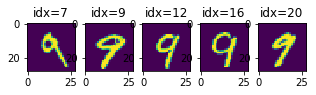

In [5]:
print("********************************")
print("TEST")
print("********************************\n")
for digit in range(10):
    try:
        sample_index = np.argwhere(y_test_org == digit)
    except ValueError:
        sample_index = []
    sample_index = sample_index.reshape(-1)
    if (len(sample_index) >= columns * rows):
        display_thumb_line(x_test_org, sample_index)

## テストデータの整形
ニューラルネットワークの入力層にするには、データを1次元にする必要があります。<br>
x_train,x_testをそれぞれ、60000枚×1次元784pxの画像に変換します。<br>

Kerasは単精度浮動小数点(float32)で演算を行うので、Kerasに合わせてテストデータの型を変換します。<br>

In [6]:
x_train = x_train.reshape(60000, 784) # [60000][28][28] -> [60000][784]に変換
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # テストデータの型をfloat32に変換
x_test = x_test.astype('float32')

# データの簡易的な正規化。データを正規化(平均0,標準偏差1になるよう変換)することで、
# 学習が早くなります。本来はBatchNormalizationとか使います。
x_train = x_train / 255 
x_test = x_test / 255

## テストデータの内容確認②

少しイメージがつかみにくいと思うので、x_trainの中身を覗いてみます。<br>

x_train[n][0] 〜 x_train[n][783] が1枚の画像データの集まりです。<br>

試しに、<br>
・x_train[0][0] 〜 x_train[0][783]<br>
・x_train[1][0] 〜 x_train[1][783]<br>
・x_train[2][0] 〜 x_train[2][783]<br>
のデータを表示してみます。<br>


********************************
x_train[0]のデータ
********************************

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 

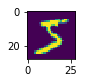

********************************
x_train[1]のデータ
********************************

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 
0 0 0 

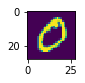

In [7]:
# 内容確認。ここは書かなくてOKです
def display_image_array(x_at_i):
    for j in range(28):
        w_str = ""
        for k in range(28):
            #w_str2 = "{0:.2f} ".format(x_train[i][28 * j + k])
            w_str2 = "{0:.0f} ".format(x_at_i[28 * j + k])
            w_str = w_str + w_str2 
        print(w_str)
    print("\n")    

for i in range(2):
    print("********************************")
    print("x_train[{}]のデータ".format(i))
    print("********************************\n")
    display_image_array(x_train[i])
    display_small_image(x_train_org[i])


## 教師ラベルの内容確認①
続いて、y_trainとy_testの内容を確認してみます。

In [8]:
#############################################
# 内容確認。ここは書かなくてOKです。
#############################################
#print("y_train:{}".format(y_train))
print("********************************")
print("y_trainの形:{}".format(y_train.shape))
print("y_train[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")
for i in range(10):
    print("y_train[{0}]=".format(i),y_train_org[i])

#print("y_test:{}".format(y_test))
print("********************************")
print("y_testの形:{}".format(y_test.shape))
print("y_test[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")
for i in range(10):
    print("y_test[{0}]=".format(i),y_test_org[i])

********************************
y_trainの形:(60000,)
y_train[0 -> 9]のデータ
********************************

y_train[0]= 5
y_train[1]= 0
y_train[2]= 4
y_train[3]= 1
y_train[4]= 9
y_train[5]= 2
y_train[6]= 1
y_train[7]= 3
y_train[8]= 1
y_train[9]= 4
********************************
y_testの形:(10000,)
y_test[0 -> 9]のデータ
********************************

y_test[0]= 7
y_test[1]= 2
y_test[2]= 1
y_test[3]= 0
y_test[4]= 4
y_test[5]= 1
y_test[6]= 4
y_test[7]= 9
y_test[8]= 5
y_test[9]= 9


## 教師ラベルの整形
出力層のノード数は10です。<br>
今は60000×1次元ですが、これを60000×10次元に変換します。

In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 教師ラベルの内容確認②
変換後の内容を確認してみましょう。


In [10]:
#############################################
# 内容確認。ここは書かなくてOKです。
#############################################
print("********************************")
print("y_trainの形:{}".format(y_train.shape))
print("y_train[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")
print("y_train[i]=".format("-")," ", "=>y_train", list(range(10)),"\n")
for i in range(10):    
    print("y_train[{0}]=".format(i),y_train_org[i], "=>y_train", y_train[i])
    
print("********************************")
print("y_testの形:{}".format(y_test.shape))
print("y_test[{0} -> {1}]のデータ".format(0, 9))
print("********************************\n")

print("y_test[i]=".format("-")," ", "=>y_test", list(range(10)),"\n")
for i in range(10):
    print("y_test[{0}]=".format(i),y_test_org[i], "=>y_test", y_test[i])

********************************
y_trainの形:(60000, 10)
y_train[0 -> 9]のデータ
********************************

y_train[i]=   =>y_train [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

y_train[0]= 5 =>y_train [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train[1]= 0 =>y_train [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[2]= 4 =>y_train [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train[3]= 1 =>y_train [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[4]= 9 =>y_train [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_train[5]= 2 =>y_train [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_train[6]= 1 =>y_train [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[7]= 3 =>y_train [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_train[8]= 1 =>y_train [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train[9]= 4 =>y_train [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
********************************
y_testの形:(10000, 10)
y_test[0 -> 9]のデータ
********************************

y_test[i]=   =>y_test [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

y_test[0]= 7 =>y_test [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_test[1]= 2 =>y_test [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_te

# ニューラルネットワーク

## ニューラルネットワークの実装①

以下の手順で行います<br>
* 1.初期化
    * model = Sequential()
* 2.最初の隠れ層を定義
    * model.add(Dense(ノード数, activation=活性化関数の名前), input_shape=(入力層の数,))
* 3.隠れ層を重ねていく…
    * model.add(Dense(ノード数, activation=活性化関数の名前))
* 4.出力層を定義
    * model.add(Dense(出力層のノード数, activation=出力層の活性化関数の名前))<br>
      分類の場合は、それぞれの分類の確率を出力する'softmax'と入れておいてください。

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # 隠れ層①
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) # 隠れ層②
model.add(Dropout(0.2))
# 隠れ層はいくら重ねてもOKです(その分処理時間がかかります)
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax')) # 出力層


## ニューラルネットワークの内容確認
model.summary()で構築したニューラルネットワークの確認ができます。<br>
今回は、入力層(784)→隠れ層(512)→隠れ層(512)→出力層(10)で構築しました。<br>
入力層以降のニューラルネットワークの定義が出力されます。

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## ニューラルネットワークの実装②

最後に、以下を設定します
* 損失関数
* 最適化アルゴリズム
* 評価方法


In [13]:
model.compile(loss='categorical_crossentropy', # 損失関数=クロスエントロピー
              optimizer=RMSprop(),             # 最適化アルゴリズムはRMSprop
              metrics=['accuracy'])            # 評価方法は正解率(accuracy)

## ニューラルネットワークの学習
model.fitで学習を進めます。<br>
引数の説明<br>
* x_train : 訓練データ
* y_train : 訓練データの教師ラベル
* batch_size : 重み・バイアス更新１回あたりのデータ数
* epochs : 訓練データを何回学習させるか
* varbose : ログ出力方法 0:出力なし 1:プログレスバーで出力 2:普通に出力
* validation_data : 性能を測るためのテストデータ

出力されるテストの結果<br>
* loss: 訓練データを入力したときの損失関数の値(小さくなっていく=学習が進んでいる)
* acc: 訓練データでの正解率
* val_loss: テストデータを入力したときの損失関数の値(小さくなっていく=学習が進んでいる)
* val_acc: テストデータでの正解率


In [14]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=1,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 9s 154us/step - loss: 0.2493 - acc: 0.9235 - val_loss: 0.1059 - val_acc: 0.9654


## ニューラルネットワークの推論
model.predict_classメソッドを使って、入力されたデータ（手書き文字）を推論します。<br>

In [15]:
# 入力データを推論
pred = model.predict_classes(x_test, batch_size=1, verbose=0)
print("NNの予想は:{}".format(pred))

NNの予想は:[7 2 1 ... 4 5 6]


## ニューラルネットワークの推論（本当にあってるのか確認）
本当にあっているのか確認します。<br>

(784,)
NNの予想は:[7]
画像は...


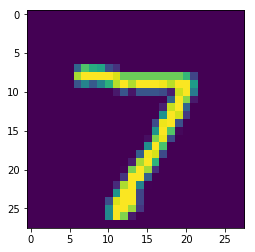

In [16]:
#############################################
# 内容確認。ここは書かなくてOKです。
#############################################

for i in range(1):
    # 入力データを推論
    print(x_test[i].shape)
    pred = model.predict_classes(x_test[i].reshape(1,-1), batch_size=1, verbose=0)
    print("NNの予想は:{}".format(pred))

    # 画面表示
    print("画像は...")
    img_px = x_test[i].reshape(28,28)
    plt.imshow(img_px)
    plt.show()

In [26]:
from IPython.core.display import HTML
import base64
from io import BytesIO
from scipy.ndimage import geometric_transform
from PIL import Image

# Moving center of image to another position
def geo_transform(a, dxdy):
    def shift_func(output_coordinates):
        return (output_coordinates[0] + dxdy[0], output_coordinates[1] + dxdy[1])
    
    return geometric_transform(a, shift_func, mode='constant')

# 1. Get image data from HTML5 canvas which is created below cells
# 2. Create grayscale image
# 3. Resize to MNIST size(28x28)
# 4. Executing geometric transform to center of image
def getImageFromCanvas(base64_img_org):
    base64_img = base64_img_org.split(",")[-1]
    
    # Create PIL Image object from binary data
    img = Image.open(BytesIO(base64.b64decode(base64_img)))
    # Create grayscale image
    img_gray = img.convert('LA')    
    
    # Resize to (28x28)
    img_gray_resize = img_gray.resize((28,28))
    
    # Convert image data to numpy array
    img_gray_resize_np = np.asarray(img_gray_resize)
    # Make the numpy array editable
    img_gray_resize_np.flags.writeable = True
    
    # Finding center of active pixel (color code>0) in resized image
    img_center_positive = np.argwhere(img_gray_resize_np[:,:,1] > 0)    
    old_center = np.sum(img_center_positive, axis=0) / img_center_positive.shape[0]        
    #print("Old center : {0}".format(old_center))
    
    # Calculate distance to move the center to center of image
    dx = (int)(old_center[0]) - (int)(img_gray_resize.size[0] / 2 - 1)
    dy = (int)(old_center[1]) - (int)(img_gray_resize.size[1] / 2 - 1)    
    #print("Dxdy :{0}".format((dx,dy)))
    
    # Using Image Geometric transform to move center
    img_gray_resize_np[:,:,1] = geo_transform(img_gray_resize_np[:,:,1], (dx,dy))
    img_gray_resize_np[:,:,0] = geo_transform(img_gray_resize_np[:,:,0], (dx,dy))
    
    # Calculate active pixel center again
    img_center_positive = np.argwhere(img_gray_resize_np[:,:,1] > 0)
    new_center = np.sum(img_center_positive, axis=0) / img_center_positive.shape[0]
    #print("New center : {0}".format(new_center))

    # Lastly, normilizing the data and conver to 1-D data by numpy flatten()
    after_normalization = img_gray_resize_np[:,:,1] / 255    
    return after_normalization.flatten()

# 1. Get image data from HTML5 canvas which is created below cells
# 2. Create grayscale image
# 3. Resize to MNIST size(28x28)
# 4. NO geometric transform to center of image
def getImageFromCanvas_WithoutGeometricTransform(base64_img_org):
    base64_img = base64_img_org.split(",")[-1]
    
    # Create PIL Image object from binary data
    img = Image.open(BytesIO(base64.b64decode(base64_img)))
    # Create grayscale image
    img_gray = img.convert('LA')    
    
    # Resize to (28x28)
    img_gray_resize = img_gray.resize((28,28))
    
    # Convert image data to numpy array
    img_gray_resize_np = np.asarray(img_gray_resize)
    # Make the numpy array editable
    img_gray_resize_np.flags.writeable = True
    
    # Lastly, normilizing the data and conver to 1-D data by numpy flatten()
    after_normalization = img_gray_resize_np[:,:,1] / 255    
    return after_normalization.flatten()

# Test user image on trained-model
def userTest(sampleImage):
    # 入力データを推論
    pred = model.predict_classes(sampleImage.reshape(1,-1), batch_size=1, verbose=0)
    print("NNの予想は:{}".format(pred))

    # 画面表示
    print("画像は...")
    img_px = sampleImage.reshape(28,28)
    plt.imshow(img_px)
    plt.show()

In [27]:
html_text = '''
    <canvas id="canvas" height="280px" width="280px" style="border: 1px solid;"></canvas>
    <p><input id="variable" type="text" placeholder="Input python variable name" size="30" value="base64_img"></p>
    <p>
        <button id="clear">Clear</button>
        <button id="submit">Save image to variable</button>
    </p>
    <p id="msg"></p>
    <script>
        var kernel = IPython.notebook.kernel;

        var config = {
            "linesize": 15,
            "linecolor": "#000000"
        }

        var mouse = {
            "X": null,
            "Y": null,
        }

        var variable = document.getElementById("variable");
        var clear = document.getElementById("clear");
        var submit = document.getElementById("submit");
        var canvas = document.getElementById("canvas");
        var ctx = canvas.getContext("2d");

        clear.addEventListener("click", function(){
            ctx.clearRect(0, 0, canvas.width, canvas.height);
        });

        submit.addEventListener("click", function(){
            if (variable.value === ""){
                msg.textContent = "Fail: Pls input variable name";
            }else{
                kernel.execute(variable.value + " = '" + canvas.toDataURL() + "'");
                msg.textContent = "Success: " + "image -> " + variable.value;
            }
        });

        canvas.addEventListener("mouseup", drawEnd, false);
        canvas.addEventListener("mouseout", drawEnd, false);

        canvas.addEventListener("mousemove", function(e){
            if (e.buttons === 1 || e.witch === 1) {
                var rect = e.target.getBoundingClientRect();
                var X = e.clientX - rect.left;
                var Y = e.clientY - rect.top;
                draw(X, Y);
            };
        });

        canvas.addEventListener("mousedown", function(e){
            if (e.button === 0) {
                var rect = e.target.getBoundingClientRect();
                var X = e.clientX - rect.left;
                var Y = e.clientY - rect.top;
                draw(X, Y);
            }
        });

        function draw(X, Y) {
            ctx.beginPath();
            if (mouse.X === null) {
                ctx.moveTo(X, Y);
            } else {
                ctx.moveTo(mouse.X, mouse.Y);
            }
            ctx.lineTo(X, Y);

            ctx.lineCap = "round";
            ctx.lineWidth = config.linesize * 2;
            ctx.strokeStyle = config.linecolor;
            ctx.stroke();

            mouse.X = X;
            mouse.Y = Y;
        };

        function drawEnd() {
            mouse.X = null;
            mouse.Y = null;
        }
    </script>
    '''

In [24]:
HTML(html_text)

NNの予想は:[9]
画像は...


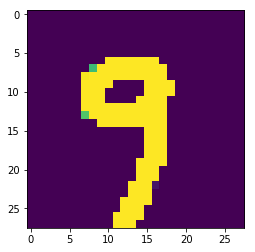

NNの予想は:[2]
画像は...


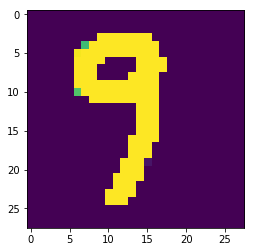

In [36]:
# Image with geometric transforming
after_pre_proc_image = getImageFromCanvas(base64_img)
userTest(after_pre_proc_image)

# Image without geometric transforming
after_pre_proc_image = getImageFromCanvas_WithoutGeometricTransform(base64_img)
userTest(after_pre_proc_image)